In [2]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load the uploaded CSV files to inspect the datafla
file_path = r'C:\Users\Pear\Documents\Data Projects\data_files\chicago_hardship_data_raw.csv'


df = pd.read_csv(file_path)

df.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Community Area Number                         77 non-null     float64
 1   COMMUNITY AREA NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER CAPITA INCOME                             78 non-null     int64  
 8   HARDSHIP INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [4]:
#Rename columns for consistency and easier reference
df.columns = [
     "Community_Area_Number", "Community_Area_Name", "Pct_Housing_Crowded",
    "Pct_Households_Below_Poverty", "Pct_Aged_16_Unemployed",
    "Pct_Aged_25_No_HS_Diploma", "Pct_Aged_Under18_Over64",
    "Per_Capita_Income", "Hardship_Index"
]

In [5]:
# Checking for missing values
df.isnull().sum()

Community_Area_Number           1
Community_Area_Name             0
Pct_Housing_Crowded             0
Pct_Households_Below_Poverty    0
Pct_Aged_16_Unemployed          0
Pct_Aged_25_No_HS_Diploma       0
Pct_Aged_Under18_Over64         0
Per_Capita_Income               0
Hardship_Index                  1
dtype: int64

In [6]:
# Drop missing values and recheck
df_cleaned = df.dropna()

df_cleaned.isnull().sum()

Community_Area_Number           0
Community_Area_Name             0
Pct_Housing_Crowded             0
Pct_Households_Below_Poverty    0
Pct_Aged_16_Unemployed          0
Pct_Aged_25_No_HS_Diploma       0
Pct_Aged_Under18_Over64         0
Per_Capita_Income               0
Hardship_Index                  0
dtype: int64

In [7]:
# Check for duplicates
duplicates = df_cleaned.duplicated(subset=["Community_Area_Name"]).sum()
print(duplicates)

0


In [8]:
# Reset index after cleaning
df_cleaned = df_cleaned.reset_index(drop=True)

In [9]:
df_cleaned.head()

,Community_Area_Number,Community_Area_Name,Pct_Housing_Crowded,Pct_Households_Below_Poverty,Pct_Aged_16_Unemployed,Pct_Aged_25_No_HS_Diploma,Pct_Aged_Under18_Over64,Per_Capita_Income,Hardship_Index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [10]:
from sklearn.preprocessing import LabelEncoder

# Drop Community_Area_Number column
df = df.drop(columns=["Community_Area_Number"])

# Apply Label Encoding to Community_Area_Name
label_encoder = LabelEncoder()
df["Community_Area_Name"] = label_encoder.fit_transform(df["Community_Area_Name"])

# Display the updated dataframe
df.head()

,Community_Area_Name,Pct_Housing_Crowded,Pct_Households_Below_Poverty,Pct_Aged_16_Unemployed,Pct_Aged_25_No_HS_Diploma,Pct_Aged_Under18_Over64,Per_Capita_Income,Hardship_Index
0,61,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,75,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,67,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,40,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,52,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remove the Community_Area_Name column
df = df.drop(columns=["Community_Area_Name"])

# Convert Hardship_Index to a binary classification target
# Median split: Below median = Low Hardship (0), Above median = High Hardship (1)
df["Hardship_Label"] = (df["Hardship_Index"] > df["Hardship_Index"].median()).astype(int)

# Define features and target variable
X = df.drop(columns=["Hardship_Index", "Hardship_Label"])  # Features
y = df["Hardship_Label"]  # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"The accuracy of this model is: {accuracy:.2%}")
print()
print(classification_rep)

The accuracy of this model is: 87.50%

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.78      1.00      0.88         7

    accuracy                           0.88        16
   macro avg       0.89      0.89      0.88        16
weighted avg       0.90      0.88      0.88        16



In [16]:
# Create a DataFrame to display feature importance

# Get updated feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Convert feature importance scores to percentages and round to 2 decimal places
feature_importance_df["Importance"] = (feature_importance_df["Importance"] * 100).round(2)

# Append '%' sign to each importance value
feature_importance_df["Importance"] = feature_importance_df["Importance"].astype(str) + "%"

# Rename the features to be easier to read
feature_importance_df["Feature"] = feature_importance_df["Feature"].str.replace("_", " ").str.replace("Pct ", "", regex=True)

# Rename specific feature names
feature_rename_map = {
    "Aged 16 Unemployed": "% Unemployed",
    "Aged 25 No HS Diploma": "% Without HS Diploma",
    "Aged Under18 Over64": "% Under 18 or Over 64",
    "Housing Crowded": "Housing Density"
}

# Apply renaming
feature_importance_df["Feature"] = feature_importance_df["Feature"].replace(feature_rename_map)

# Reset index
feature_importance_df = feature_importance_df.reset_index(drop=True)

# Display updated feature importance values
feature_importance_df

,Feature,Importance
0,Per Capita Income,39.21%
1,Households Below Poverty,24.26%
2,% Unemployed,14.12%
3,% Without HS Diploma,12.16%
4,% Under 18 or Over 64,7.81%
5,Housing Density,2.44%


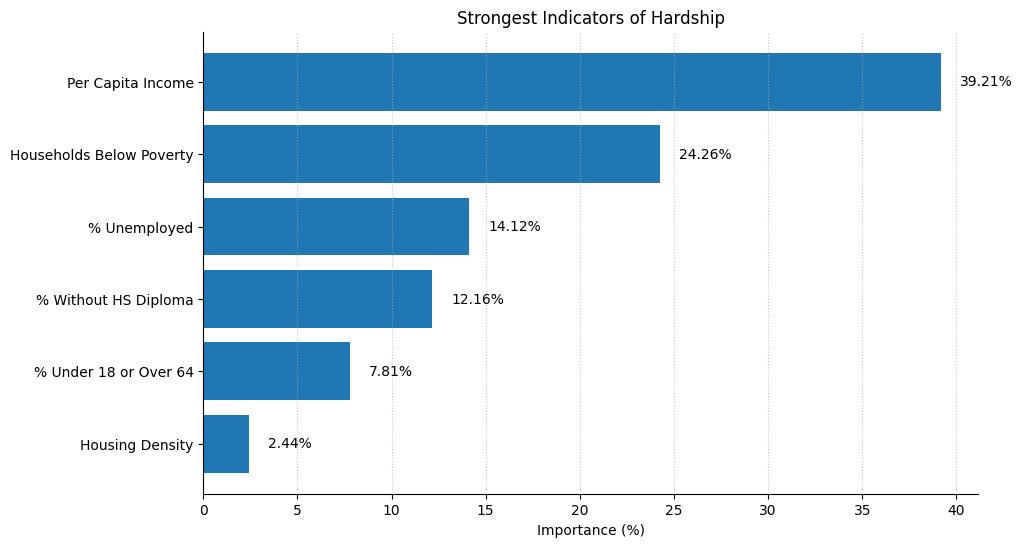

In [17]:
# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df["Feature"], 
                [float(value.strip('%')) for value in feature_importance_df["Importance"]], 
                align="center")

# Add percentage labels to each bar
for bar, value in zip(bars, feature_importance_df["Importance"]):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, value, va='center')

# Remove the top and right spines (box outline)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Add dotted grid lines
plt.grid(axis='x', linestyle='dotted', alpha=0.7)

plt.xlabel("Importance (%)")
plt.title("Strongest Indicators of Hardship")
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top
plt.show()